In [1]:
%load_ext nb_black

# Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
## to read the data from the source
data = pd.read_excel("House+Price+Prediction+-+Dataset.xlsx")

<IPython.core.display.Javascript object>

In [3]:
## get the first five rows.
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


<IPython.core.display.Javascript object>

In [4]:
## view the last 5 rows
data.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,203600600,20150310T000000,685530,4.0,2.50,3130.0,60467.0,2,0,0.0,...,0.0,1996,0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597
21609,625049281,20140521T000000,535000,2.0,1.00,1030.0,4841.0,1,0,0.0,...,110.0,1939,0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871
21610,424069018,20140905T000000,998000,3.0,3.75,3710.0,34412.0,2,0,0.0,...,800.0,1978,0,98075,47.5888,-122.04,2390.0,34412.0,1.0,38122
21611,7258200055,20150206T000000,262000,4.0,2.50,1560.0,7800.0,2,0,0.0,...,0.0,1997,0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360
21612,8805900430,20141229T000000,1150000,4.0,2.50,1940.0,4875.0,2,0,0.0,...,0.0,1925,0,98112,47.6427,-122.304,1790.0,4875.0,1.0,6815


<IPython.core.display.Javascript object>

In [5]:
## checking condition cols contents
data.condition

0        3
1        4
2        3
3        3
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    4
Name: condition, Length: 21613, dtype: object

<IPython.core.display.Javascript object>

In [6]:
## Data shape to check no. of rows and cols

data.shape

(21613, 23)

<IPython.core.display.Javascript object>

In [7]:
## know about the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

<IPython.core.display.Javascript object>

#### Observations: 
- we Observe from data info that there some columns having missing data, which need to be imbuted.
- CID is a notion of the hous and most probably will drop it as of this stage
- dayhours & yr_built columns need to be converted to date time format.
- Coast, sight and furnished coulmns contain Pinary Variables which later on need to be converted to dummy variables.
- Total are coulmns is extra information which combination between lot and living measures


In [8]:
## Convert dayhours to date
data["dayhours"] = pd.to_datetime(data["dayhours"])
data.dayhours

0       2015-04-27
1       2015-03-17
2       2014-08-20
3       2014-10-10
4       2015-02-18
           ...    
21608   2015-03-10
21609   2014-05-21
21610   2014-09-05
21611   2015-02-06
21612   2014-12-29
Name: dayhours, Length: 21613, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [9]:
## let's check data five numbers summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
sight,21556.0,2.343663e-01,7.664376e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
quality,21612.0,7.656857e+00,1.175484e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21612.0,2.915225e+02,4.425808e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


<IPython.core.display.Javascript object>

#### Observations to important features

- we observe that the price average ~ 540K , min: 75K and Max: 7.7M, a potential of outliers.
- Average room bed: 3, maximum: 33 which looks like typo or need investigation of this number, any how outliers must be trated in this case
- Average living measures: 2,080 SQF, Min : 290 and Max: 13,540, a potential of outliers!!



In [10]:
## Check about null values
data.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

<IPython.core.display.Javascript object>

#### Observation
- Few missing data is obseved, largest is 166 in Linving Measures
- we will drop column lot Measures having 42 missing data as we have anothor column which lot measure15 having less missing data.
- we will impute rest using median of each column considering presence of outliers.

In [11]:
# take copy of the data
df = data.copy()
# Drop lot_measure
df.drop('lot_measure', axis=1, inplace=True)  # axis=1 for columns

# Impute missing values with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']) 
df.fillna(numeric_cols.median(), inplace=True)  
df.isna().sum()


##


cid                  0
dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
ceil                42
coast                1
sight                0
condition           57
quality              0
ceil_measure         0
basement             0
yr_built             1
yr_renovated         0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area          29
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
- remaing missing data columns seems to be object dtype therefore, will impute them using mode instead

In [12]:
# Impute missing & dollar sign values of object type with mode()
for col in df.select_dtypes(include="object").columns:
    mode_value = df[col].mode().iloc[0]
    df[col].fillna(mode_value, inplace=True)
df.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
## we observed special Charachter "$" let's see the count of it
df[df == "$"].count()


cid                  0
dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
ceil                30
coast               30
sight                0
condition           28
quality              0
ceil_measure         0
basement             0
yr_built            14
yr_renovated         0
zipcode              0
lat                  0
long                34
living_measure15     0
lot_measure15        0
furnished            0
total_area          68
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
## let's drop the rows having $ and save it in new variable df_clean
df_clean = df.replace({"$": np.NAN}, regex=True).dropna()
df_clean[df_clean == "$"].count()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
## let's check, how many rows was dropped
df_clean.shape[0] - df.shape[0]

-170

<IPython.core.display.Javascript object>

#### Observation
- very minimal rows were dropped, good to go.

## EDA

### Univariate Analysis

In [16]:
df_clean.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

<IPython.core.display.Javascript object>

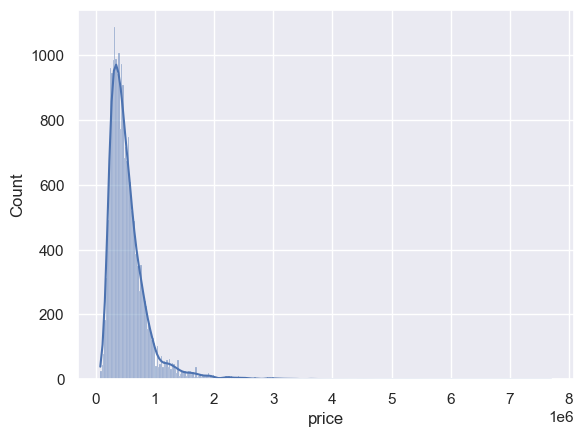

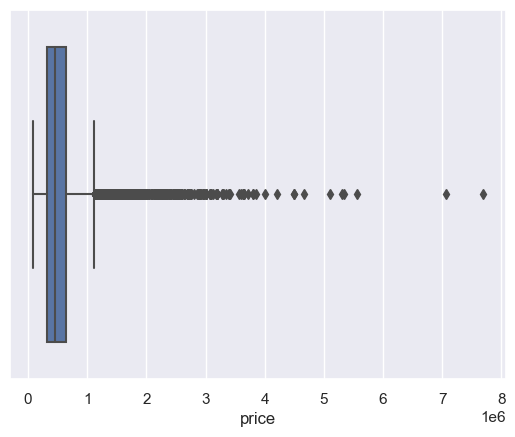

<IPython.core.display.Javascript object>

In [17]:
sns.histplot(data=df_clean, x="price", kde=True)
plt.show()
sns.boxplot(data=df_clean, x="price")
plt.show()

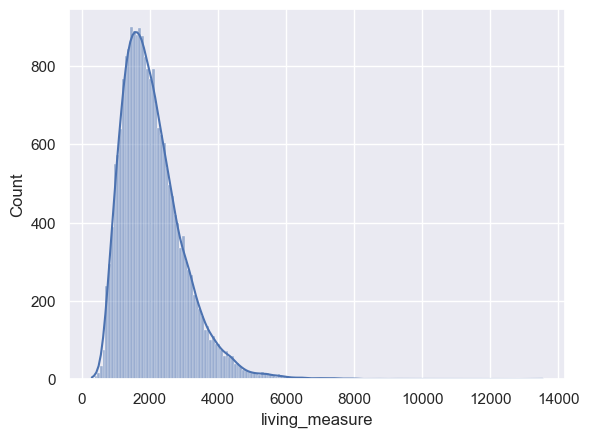

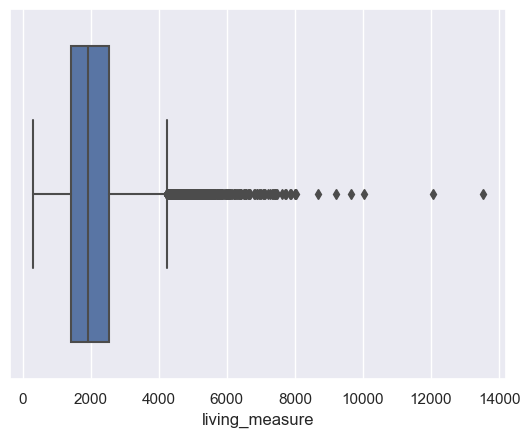

<IPython.core.display.Javascript object>

In [18]:
sns.histplot(data=df_clean, x="living_measure", kde=True)
plt.show()
sns.boxplot(data=df_clean, x="living_measure")
plt.show()

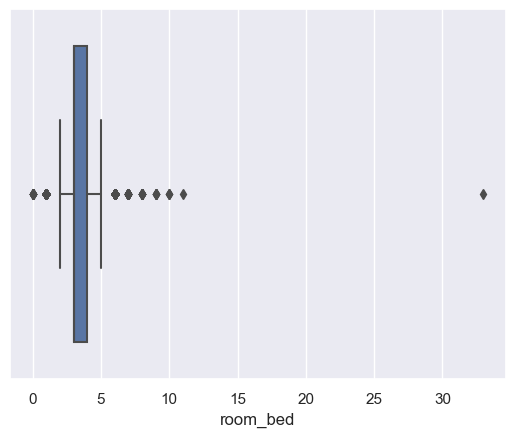

<IPython.core.display.Javascript object>

In [19]:
sns.boxplot(data=df_clean, x="room_bed")
plt.show()

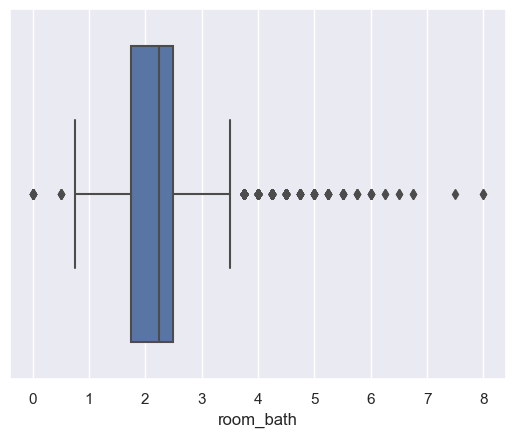

<IPython.core.display.Javascript object>

In [20]:
sns.boxplot(data=df_clean, x="room_bath")
plt.show()

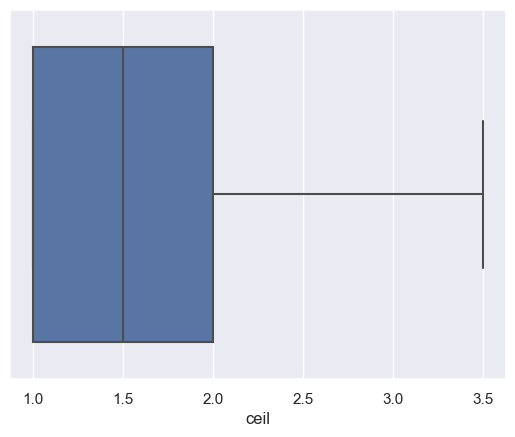

<IPython.core.display.Javascript object>

In [21]:
sns.boxplot(data=df_clean, x="ceil")
plt.show()

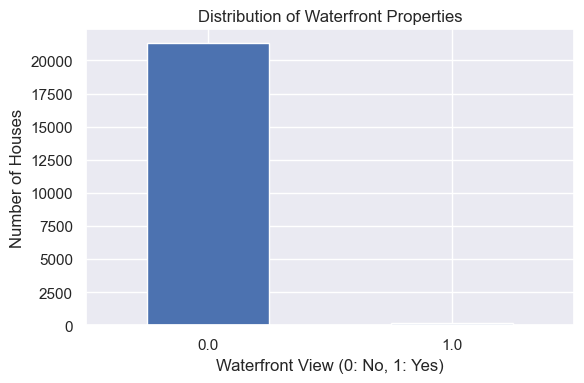

<IPython.core.display.Javascript object>

In [22]:
waterfront_counts = df_clean['coast'].value_counts().sort_values(ascending=False)  

plt.figure(figsize=(6, 4))  
waterfront_counts.plot(kind='bar')  
plt.xlabel('Waterfront View (0: No, 1: Yes)')  
plt.ylabel('Number of Houses')
plt.title('Distribution of Waterfront Properties')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


In [23]:
## check value counts of
df_clean.coast.value_counts()

0.0    21283
1.0      160
Name: coast, dtype: int64

<IPython.core.display.Javascript object>

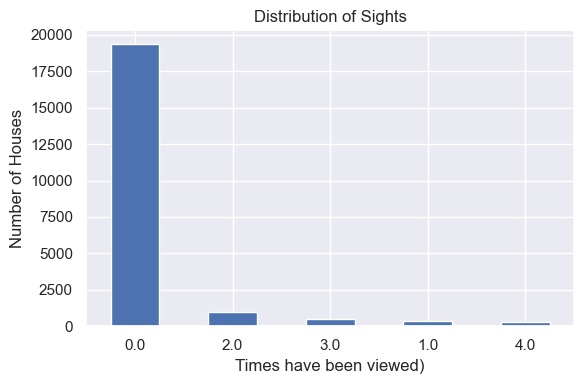

<IPython.core.display.Javascript object>

In [24]:
sight_counts = df_clean["sight"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sight_counts.plot(kind="bar")
plt.xlabel("Times have been viewed)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Sights")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

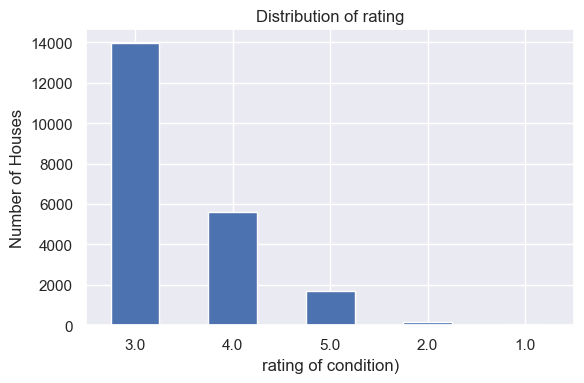

<IPython.core.display.Javascript object>

In [25]:
condition_counts = df_clean["condition"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
condition_counts.plot(kind="bar")
plt.xlabel("rating of condition)")
plt.ylabel("Number of Houses")
plt.title("Distribution of rating")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

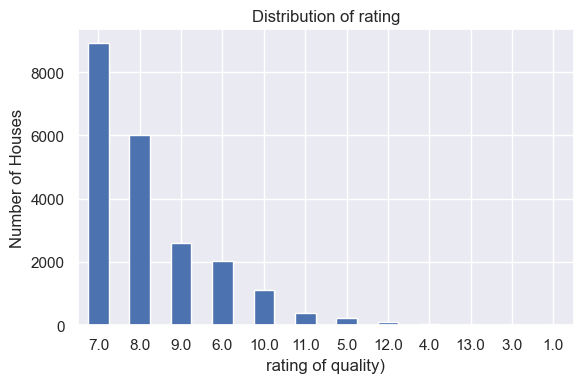

<IPython.core.display.Javascript object>

In [26]:
quality_counts = df_clean["quality"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
quality_counts.plot(kind="bar")
plt.xlabel("rating of quality)")
plt.ylabel("Number of Houses")
plt.title("Distribution of rating")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

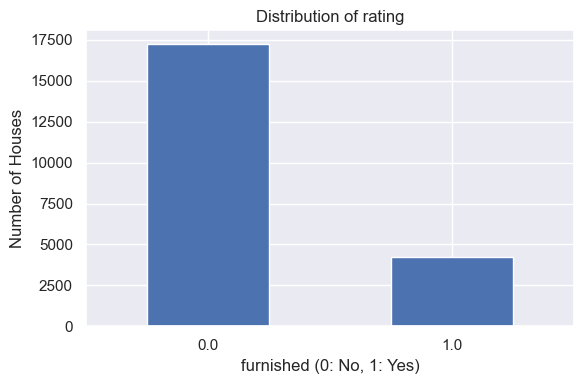

<IPython.core.display.Javascript object>

In [27]:
furnished_counts = df_clean["furnished"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
furnished_counts.plot(kind="bar")
plt.xlabel("furnished (0: No, 1: Yes)")
plt.ylabel("Number of Houses")
plt.title("Distribution of rating")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
df_clean.furnished.value_counts(normalize=True)

0.0    0.803059
1.0    0.196941
Name: furnished, dtype: float64

<IPython.core.display.Javascript object>

## Bivariate Analaysis

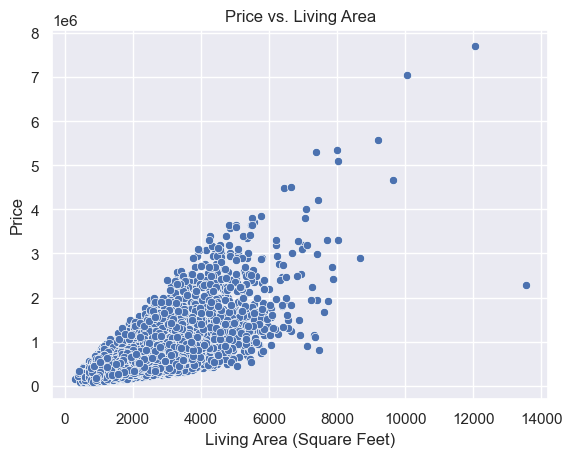

<IPython.core.display.Javascript object>

In [29]:
sns.scatterplot(x="living_measure", y="price", data=df_clean)
plt.xlabel("Living Area (Square Feet)")
plt.ylabel("Price")
plt.title("Price vs. Living Area")
plt.show()

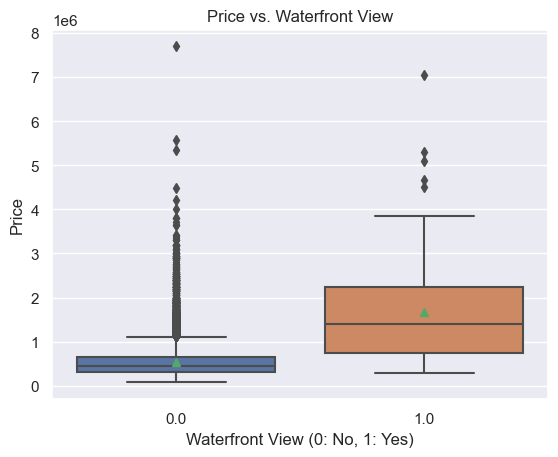

<IPython.core.display.Javascript object>

In [30]:
sns.boxplot(x="coast", y="price", showmeans=True, data=df_clean)
plt.xlabel("Waterfront View (0: No, 1: Yes)")
plt.ylabel("Price")
plt.title("Price vs. Waterfront View")
plt.xticks(rotation=0)
plt.show()

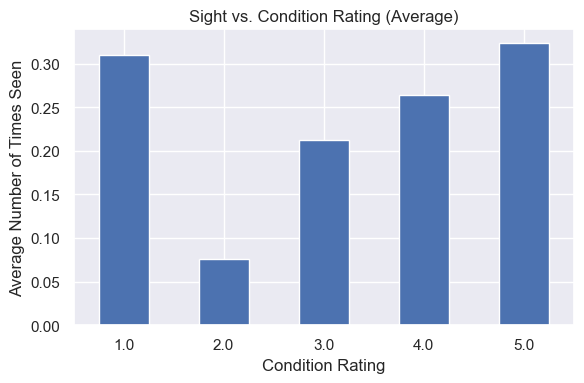

<IPython.core.display.Javascript object>

In [31]:
sight_by_condition = df_clean.groupby("condition")["sight"].mean()
plt.figure(figsize=(6, 4))
sight_by_condition.plot(kind="bar")
plt.xlabel("Condition Rating")
plt.ylabel("Average Number of Times Seen")
plt.title("Sight vs. Condition Rating (Average)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

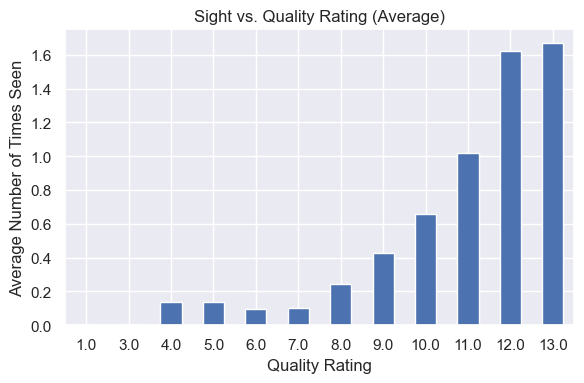

<IPython.core.display.Javascript object>

In [32]:
sight_by_quality = df_clean.groupby("quality")["sight"].mean()
plt.figure(figsize=(6, 4))
sight_by_quality.plot(kind="bar")


plt.xlabel("Quality Rating")
plt.ylabel("Average Number of Times Seen")
plt.title("Sight vs. Quality Rating (Average)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Features Engineering
preparing the data for modeling

### Drop unnecessary columns

there is some overlap between the columns related to the size of the house and lot, especially considering the addition of "living_measure15" and "lot_measure15" that potentially reflect renovations in 2015. 

living_measure: This refers to the total square footage of the house, likely including the basement.
lot_measure: This represents the total square footage of the entire property, including the house and surrounding land.
ceil_measure: This column indicate the total square footage of the house excluding the basement. As "ceil" refers to the number of floors (levels) in the house, and "ceil_measure" captures the total living space across these floors (excluding the basement).
 
living_measure15: This represents the living room area specifically after the renovations in 2015. It might not reflect changes to the overall house size ("living_measure") if the renovations only affected the living room.
lot_measure15: This represents the entire property's square footage (including the house) after the renovations in 2015. It could potentially capture additions or modifications to the house that might have increased the overall footprint on the lot.

So,columns to Drop:

1- living_measure15: As it captures only living room area post-renovation, potentially redundant with "living_measure" if renovations didn't affect overall size.

2 - lot_measure15 As it captures property size post-renovation, might be redundant with "lot_measure" if changes were minimal.
 
Columns to Keep:

1- living_measure: As it represents total house square footage, likely including the basement.
2 -lot_measure: as it represents total property square footage (including house) before renovations.
3- ceil_measure as it captures house square footage excluding basement, can be usefull to analysis the house size only without basement

Other columns considered to be dropped:

1- cid: This is  a unique identifier for each house and wouldn't be informative for predicting price.
2- dayhours: Date the house was sold might not directly influence current price. 
3- Zipcode: dropping it if correlation with price is low.
4- lat: dropping it if correlation with price is low.
long : dropping it if correlation with price is low.
furnished: dropping it if correlation with price is low.

In [33]:
## let's check the corr of mentioned columns above to the price
correlation = df_clean.corr()

price_correlation = correlation["price"]

print("Correlation between price and zipcode:", price_correlation["zipcode"])
print("Correlation between price and latitude:", price_correlation["lat"])
print("Correlation between price and longitude:", price_correlation["long"])
print("Correlation between price and furnished:", price_correlation["furnished"])

Correlation between price and zipcode: -0.05298483553229799
Correlation between price and latitude: 0.30811136932439304
Correlation between price and longitude: 0.021584979418394334
Correlation between price and furnished: 0.5683800439268029


/var/folders/96/2fhhdcjn663fz4tk2pd_mr2w0000gn/T/ipykernel_41635/1029304587.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_clean.corr()


<IPython.core.display.Javascript object>

#### Observations: 
Zipcode: The correlation between price and zipcode is very weak (-0.05). This suggests that zip code alone might not be a strong predictor of price. will drop

Latitude: The correlation between price and latitude is moderate (0.31). This indicates a somewhat positive relationship, where higher latitudes might be associated with higher prices.  will keep

Longitude: is very weak (0.02). will drop as we will keep Latitide

Furnished: The correlation between price and furnished is strong (0.57). This suggests that furnished houses might tend to sell for higher prices. will keep

In [34]:
#### drop the columns and create new dataframe clean1

columns_to_drop = [
    'cid', 'dayhours', 'zipcode', 'long', 'total_area','living_measure15', 'lot_measure15']
df_clean1 = df_clean.drop(columns_to_drop, axis=1)  

df_clean1.head()


,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,lat,furnished
0,600000,4.0,1.75,3050.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0,47.7228,0.0
1,190000,2.0,1.00,670.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0,47.5546,0.0
2,735000,4.0,2.75,3040.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,47.5188,0.0
3,257000,3.0,2.50,1740.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,47.3363,0.0
4,450000,2.0,1.00,1120.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0,47.5663,0.0


<IPython.core.display.Javascript object>

In [35]:
df_clean1.shape

(21443, 15)

<IPython.core.display.Javascript object>

In [36]:
df_clean1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'lat', 'furnished'],
      dtype='object')

<IPython.core.display.Javascript object>

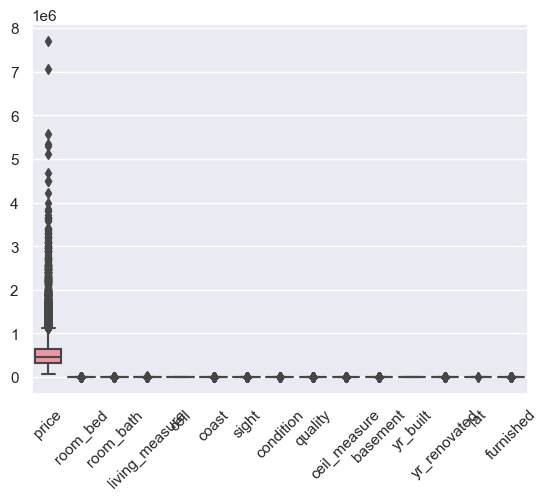

<IPython.core.display.Javascript object>

In [37]:
# Create a box plot for all numerical features (excluding categorical features)
sns.boxplot(
    data=df_clean1.select_dtypes(include=[np.number]), 
    orient="v"  
)

plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='room_bed'>

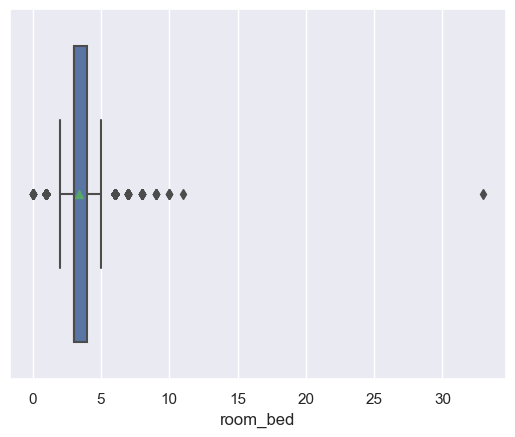

<IPython.core.display.Javascript object>

In [38]:
sns.boxplot(
    x="room_bed",
    showmeans=True,
    data=df_clean1,
)

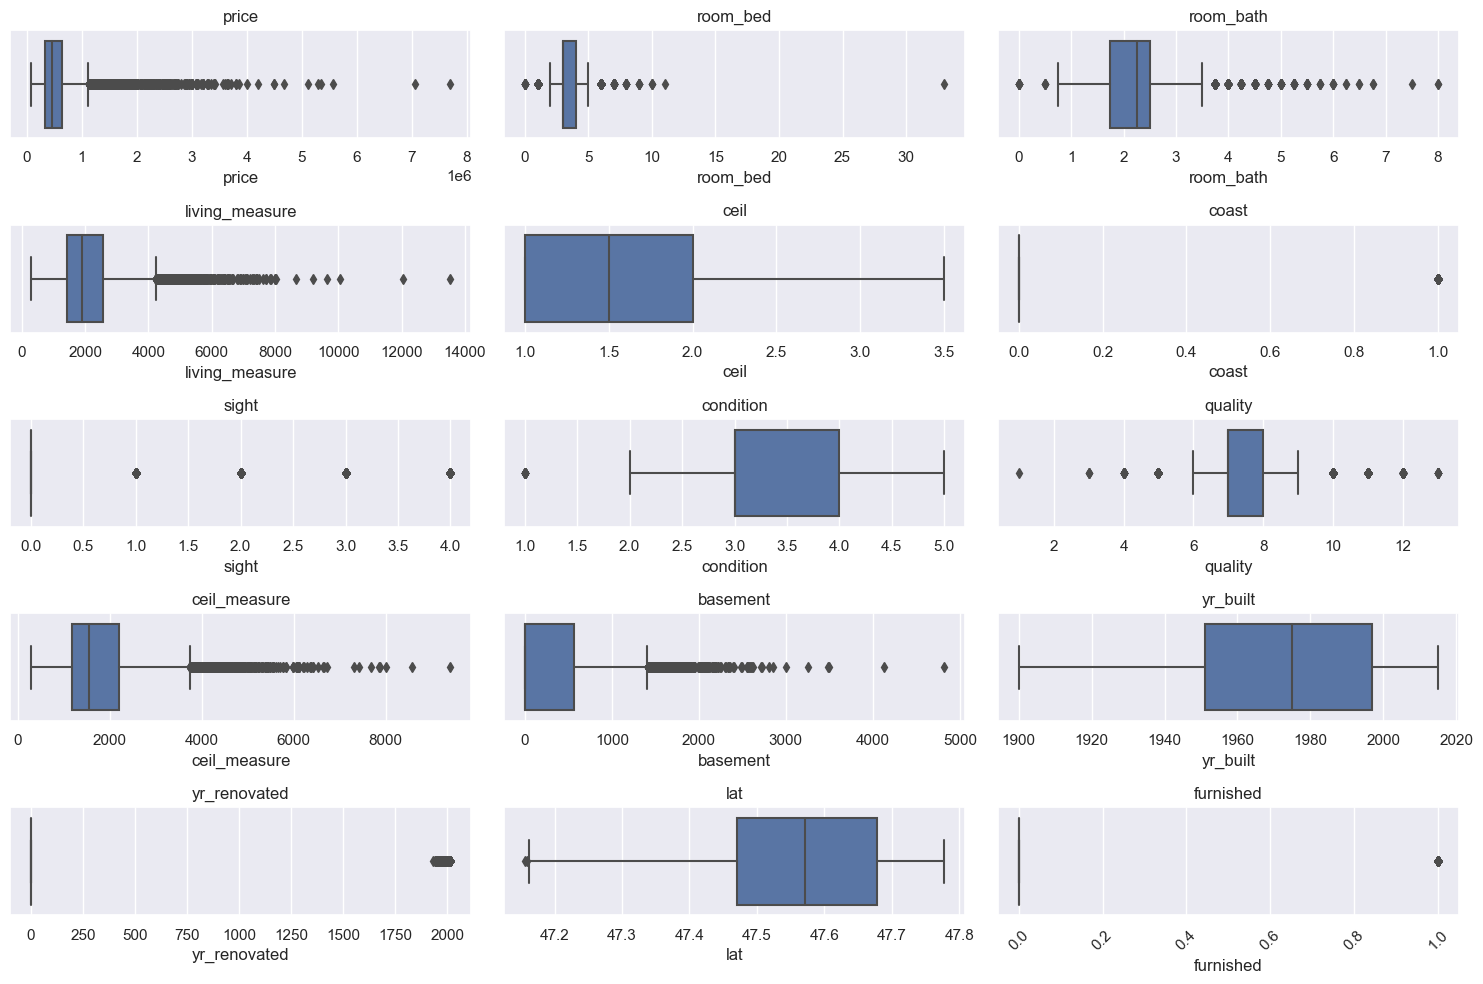

<IPython.core.display.Javascript object>

In [39]:
## define the numerical cols
numerical_cols = df_clean1.select_dtypes(include=[np.number]).columns

# Create a figure with subplots 3 columns in grid
fig, axes = plt.subplots(nrows=int((len(numerical_cols) - 1) / 3) + 1, ncols=3, figsize=(15, 10))  

# Now Creating box plots for each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes.flat[i]  
    sns.boxplot(
      x = col,
      data=df_clean1,
      ax=ax  
  )
    ax.set_title(col)  
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


as we observed there is some outliers in column such as price, room bed, room bath, living measures, basement measures,lat, where there is other column such coast, sight, condition, quality, furnished tend to be categorical values, i.e binary values will be in next stage ocnverted into binary values. but let's now focus on non binary values

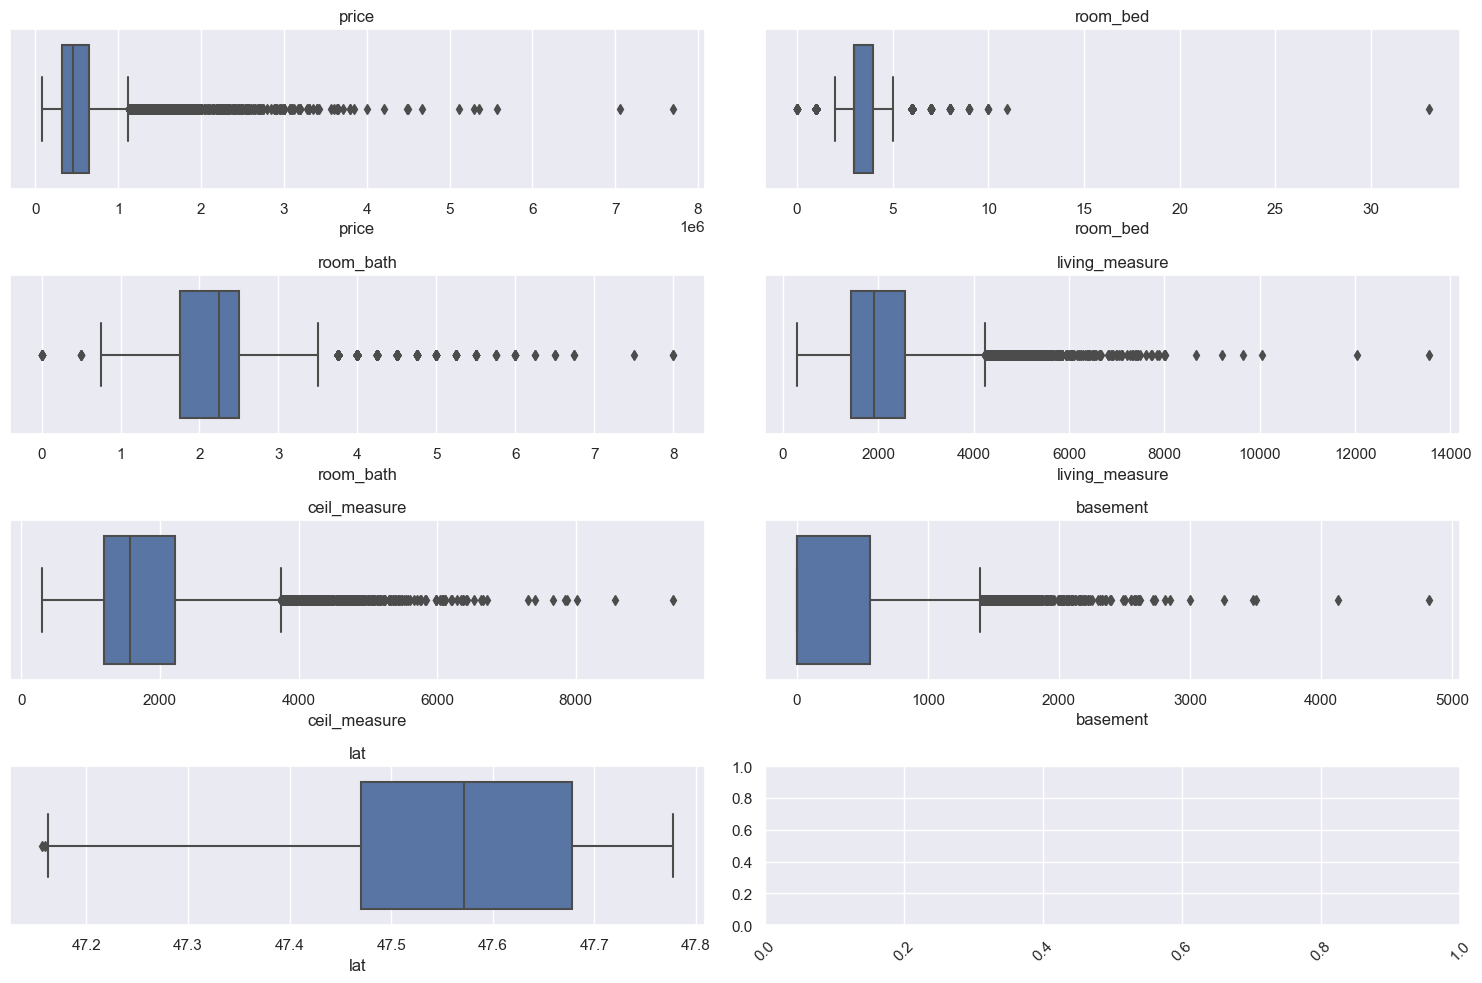

<IPython.core.display.Javascript object>

In [40]:
## define the numerical cols
cols_to_plot = [
    "price",
    "room_bed",
    "room_bath",
    "living_measure",
    "ceil_measure",
    "basement",
    "lat",
]

# Create a figure with subplots 3 columns in grid
fig, axes = plt.subplots(
    nrows=int((len(cols_to_plot) - 1) / 2) + 1, ncols=2, figsize=(15, 10)
)

# Now Creating box plots for each numerical column
for i, col in enumerate(cols_to_plot):
    ax = axes.flat[i]  # Access each subplot
    sns.boxplot(x=col, data=df_clean1, ax=ax)
    ax.set_title(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
### Now let's describe these column for more insights
summary = df_clean1[cols_to_plot].describe().T
round(summary, 3)

,count,mean,std,min,25%,50%,75%,max
price,21443.0,539972.980,365203.793,75000.000,322000.000,450000.000,645000.000,7700000.000
room_bed,21443.0,3.370,0.929,0.000,3.000,3.000,4.000,33.000
room_bath,21443.0,2.115,0.768,0.000,1.750,2.250,2.500,8.000
living_measure,21443.0,2079.960,917.360,290.000,1430.000,1910.000,2550.000,13540.000
ceil_measure,21443.0,1788.795,827.528,290.000,1190.000,1560.000,2210.000,9410.000
basement,21443.0,291.304,442.528,0.000,0.000,0.000,560.000,4820.000
lat,21443.0,47.560,0.139,47.156,47.471,47.572,47.678,47.778


<IPython.core.display.Javascript object>

In [42]:
# Saving cleaned file in excel format named data for ML,for further ML working
df_clean.to_excel("DF_ML.xlsx", sheet_name="Data_For_ML")

<IPython.core.display.Javascript object>